In [85]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import misc

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
from logparser import LogReader, PosReader, RinexReader, MatReader
import logparser as lp

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
#dataset_path = "/mnt/c/Users/vmangr/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"
dataset_path = "/mnt/c/Users/Antoine/OneDrive - TUNI.fi/Shared/GEOLOC/dataset/"

# Open-sky

In [87]:
survey = 'S1'
folder_path = f"{dataset_path}{survey}"
device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

In [88]:
acq_list = ['A8']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))


In [89]:
log_dict['UA']

,tow,latitude,longitude,altitude,datetime,provider,mode,acquisition
0,207350.805,47.156354,-1.640262,81.000000,2024-03-19 09:35:32.805,HYB,TEXTING,A8
1,207351.005,47.156354,-1.640262,81.006248,2024-03-19 09:35:33.005,HYB,TEXTING,A8
2,207351.205,47.156354,-1.640262,81.006248,2024-03-19 09:35:33.205,HYB,TEXTING,A8
3,207351.405,47.156354,-1.640262,81.006248,2024-03-19 09:35:33.405,HYB,TEXTING,A8
4,207351.605,47.156354,-1.640261,81.006248,2024-03-19 09:35:33.605,HYB,TEXTING,A8
...,...,...,...,...,...,...,...,...
7047,207916.285,47.156073,-1.639314,81.000481,2024-03-19 09:44:58.285,PDR,TEXTING,A8
7048,207916.795,47.156077,-1.639321,81.000473,2024-03-19 09:44:58.795,PDR,TEXTING,A8
7049,207917.335,47.156081,-1.639328,81.000465,2024-03-19 09:44:59.335,PDR,TEXTING,A8
7050,207917.875,47.156086,-1.639332,81.000459,2024-03-19 09:44:59.875,PDR,TEXTING,A8


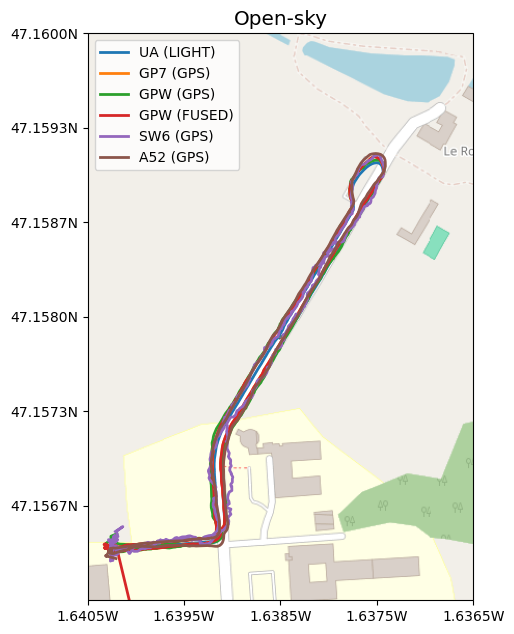

In [90]:
acq_list = ['A8']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
center = [47.158, -1.6385]
extent = [center[1] - 0.002, center[1] + 0.002, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['UA (LIGHT)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(5,6.5))
plt.title("Open-sky")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

## Positioning quality

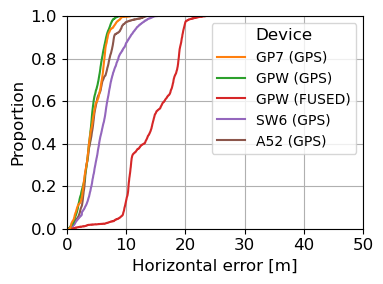

In [91]:
acq_list = ['A8', 'A10']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))

provider_uliss = 'HYB'
#provider_android = 'GPS'

provider_android = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS']}

log_diff = misc.getENUErrors(log_dict, device_uliss[0], acq_list, provider_uliss, provider_android)

PALETTE_COLOR_DEVICE = {"GP7 (GPS)": "#ff7f0e", 
                        "GPW (GPS)": "#2ca02c", 
                        "GPW (FUSED)":"#d62728",
                        "SW6 (GPS)" : "#9467bd", 
                        "A52 (GPS)" : "#8c564b"}

misc.plotECDF(log_diff, device_order=PALETTE_COLOR_DEVICE)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)

In [92]:
log_dict['UA']['provider'].unique()

array(['HYB', 'LIGHT', 'PDR'], dtype=object)

# Urban canyoning

In [115]:
survey = 'S4'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

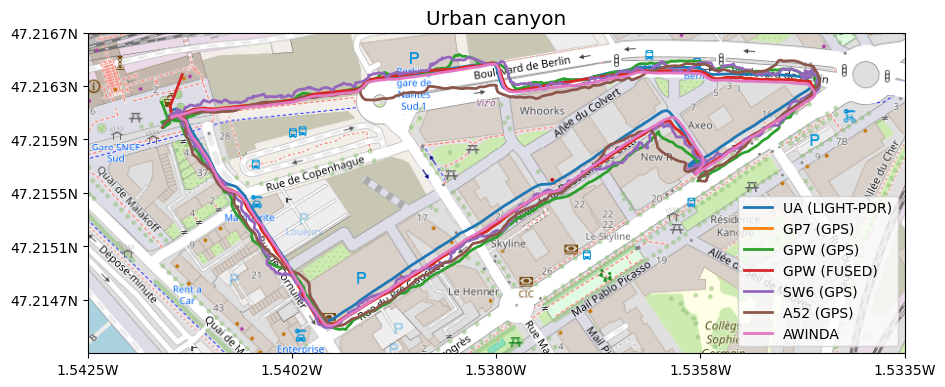

In [116]:
acq_list = ['A1']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
center = [47.2155, -1.538]
extent = [center[1] - 0.0045, center[1] + 0.0045, center[0] - 0.0012, center[0] + 0.0012]
#extent = [center[1] - 0.008, center[1] + 0.008, center[0] - 0.005, center[0] + 0.005]

locations = {}
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['HYB']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(10,4))
plt.title("Urban canyon")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

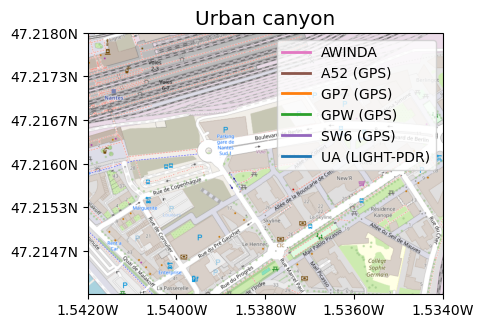

In [114]:
acq_list = ['A2']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
center = [47.216, -1.538]
extent = [center[1] - 0.004, center[1] + 0.004, center[0] - 0.002, center[0] + 0.002]

locations = {}
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['SW6 (GPS)'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['LIGHT-PDR']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=17, figsize=(5,6.5))
plt.title("Urban canyon")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

#plt.grid()

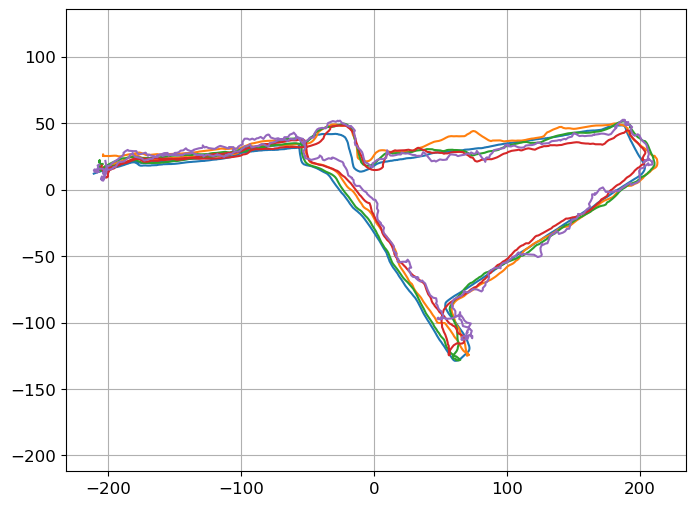

In [96]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)

## Positioning quality

In [108]:
acq_list = ['A1', 'A2']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))
provider_uliss = 'HYB'
#provider_android = 'GPS'

provider_devices = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS'], 'UA':['HYB']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
log_diff = misc.getENUErrors(log_dict, 'AWINDA', acq_list, 'AWINDA', provider_devices)


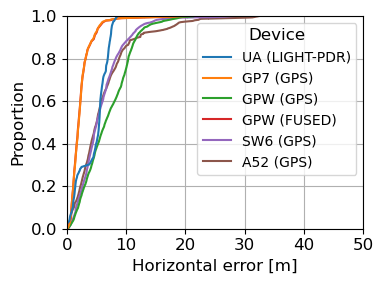

In [109]:
PALETTE_COLOR_DEVICE = {"UA (LIGHT-PDR)":"#1f77b4",
                        "GP7 (GPS)": "#ff7f0e", 
                        "GPW (GPS)": "#2ca02c", 
                        "GPW (FUSED)":"#d62728",
                        "SW6 (GPS)" : "#9467bd", 
                        "A52 (GPS)" : "#8c564b"}

misc.plotECDF(log_diff, device_order=PALETTE_COLOR_DEVICE)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)

# Light indoor

In [110]:
survey = 'S3'
folder_path = folder_path = f"{dataset_path}{survey}"

device_android = ['A52', 'GP7', 'GPW', 'SW6']
device_uliss = ['UA']
device_awinda = ['AWINDA']

## Plot trajectory

In [100]:
acq_list = ['A4']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, mode=['TEXTING', 'SWINGING', 'POCKET'], survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))

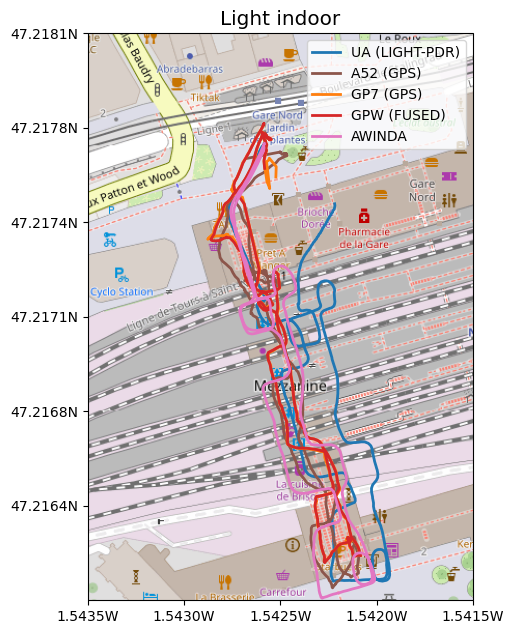

In [103]:
center = [47.2171, -1.5425]
extent = [center[1] - 0.001, center[1] + 0.001, center[0] - 0.001, center[0] + 0.001]

locations = {}
locations['UA (LIGHT-PDR)'] = log_dict['UA'].loc[log_dict['UA']['provider'].isin(['HYB']), ["latitude", "longitude"]]
locations['A52 (GPS)'] = log_dict['A52'].loc[log_dict['A52']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GP7 (GPS)'] = log_dict['GP7'].loc[log_dict['GP7']['provider'].isin(['GPS']), ["latitude", "longitude"]]
#locations['GPW (GPS)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['GPW (FUSED)'] = log_dict['GPW'].loc[log_dict['GPW']['provider'].isin(['FUSED']), ["latitude", "longitude"]]
#locations['SW6'] = log_dict['SW6'].loc[log_dict['SW6']['provider'].isin(['GPS']), ["latitude", "longitude"]]
locations['AWINDA'] = log_dict['AWINDA'].loc[log_dict['AWINDA']['provider'].isin(['AWINDA']), ["latitude", "longitude"]]
#locations[device] = log.loc[log['provider'].isin(['HYB']), ["latitude", "longitude"]]
misc.plotMap(locations=locations, extent=extent, scale=18, figsize=(5,6.5))
plt.title("Light indoor")
plt.tight_layout()
plt.savefig(f'./Figures/pos_{survey}_{acq_list[0]}.png', dpi=300)

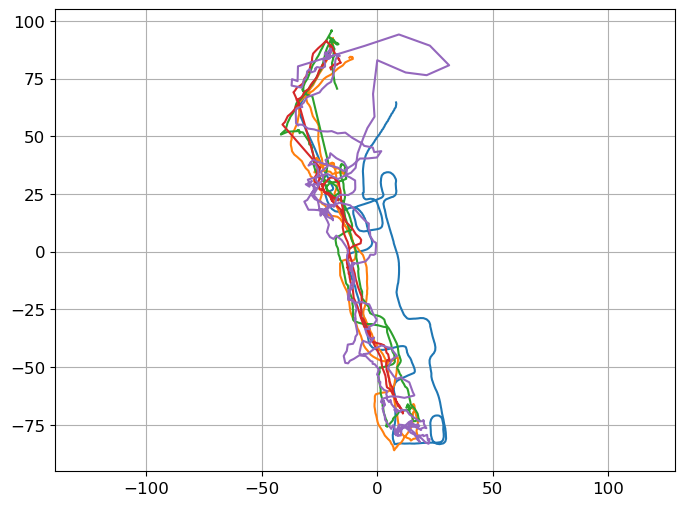

In [50]:
provider_uliss = 'HYB'
provider_android = 'GPS'
misc.plotEN(log_dict, device_android, device_uliss[0], acq_list[0], provider_uliss, provider_android)


## Positioning quality

In [111]:
acq_list = ['A2', 'A4']

log_dict = {}
log_dict.update(misc.load_fix(folder_path, acq_list, device_android, survey=survey))
log_dict.update(misc.load_light(folder_path, acq_list, device_uliss, survey=survey))
log_dict.update(misc.load_awinda(folder_path, acq_list, device_awinda, survey=survey))

provider_uliss = 'HYB'
#provider_android = 'GPS'

#provider_android = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
provider_devices = {'A52':['GPS'], 'GP7':['GPS'], 'GPW':['GPS','FUSED'], 'SW6':['GPS'], 'UA':['HYB']}

#log_diff = misc.getENUErrors(log_dict, device_android, device_uliss[0], acq_list, provider_uliss, provider_android)
log_diff = misc.getENUErrors(log_dict, 'AWINDA', acq_list, 'AWINDA', provider_devices)

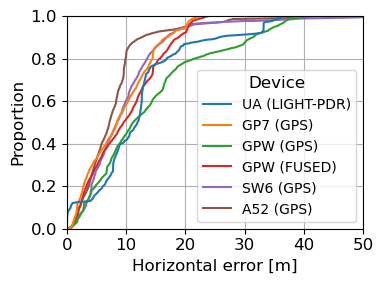

In [113]:

PALETTE_COLOR_DEVICE = {"UA (LIGHT-PDR)":"#1f77b4",
                        "GP7 (GPS)": "#ff7f0e", 
                        "GPW (GPS)": "#2ca02c", 
                        "GPW (FUSED)":"#d62728",
                        "SW6 (GPS)" : "#9467bd", 
                        "A52 (GPS)" : "#8c564b"}

misc.plotECDF(log_diff, device_order=PALETTE_COLOR_DEVICE)
plt.savefig(f'./Figures/pos_ecdf_{survey}_texting.png', dpi=300)